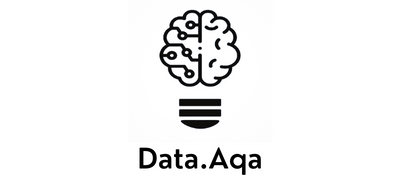

## <font color = #21618C> Visualização de Dados com matplotlib
---


Matplotlib é a biblioteca 'padrão' para visualização de dados em python. Existem outras bibliotecas - como a Seaborn - foram que construídas em cima do matplotlib. Aprendendo a usar o matplotlib, aprendemos também a lógica por trás das outras bibliotecas.

Existem três maneiras de se usar o matplotlib:

$\rightarrow$ Módulo matplotlib.pyplot;

$\rightarrow$ Integração com o pandas;

$\rightarrow$ Programação Orientada à Objetos

Mas antes de entrarmos nos detalhes delas, precisamos definir algumas coisas.

## <font color = #21618C> Elementos de uma visualização
---
Uma visualização é composta por um hierarquia de elementos que, quando combinados, formam a visualização completa.

Estes elementos são:
* Figure;
* Axes;
* Axis;
* Spines.

Vou passar brevemente por cada um deles.    

### 1. Figure
---
A figura, ou figure, é o elemento mais importante da visualização por um simples motivo: tudo é construindo em cima dela.

Podemos pensar na Figure como uma tela branca de pintura. Sem ela, não existe a pintura. Todos os outros elementos da visualização estão contidos na Figure.

### 1.1 Axes
---
O Axes, ou eixos (sim, no plural!), é o gráfico em si. Um outro nome para ele é *subplot*.

Eles são compostos por 4 limites chamados *spines*. Estes limites podem ser decorados com *ticks* (as marcações nos eixos dos gráficos) e *labels*, ou títulos. Além disso, o próprio subplot pode ter um título.

Vale dizer que podemos ter quantos Axes quisermos dentro de uma figura.

### 1.2 Axis
---
O Axis, ou eixo (agora sim no singular), são o quê nós conhecemos como eixo-x e eixo-y. Elas são automaticamente decorados pelo matplotlib quando criamos uma visualização.

Eles são compostos por uma *spine*, *ticks* (grandes e pequenos / major e minor) e *tick labels* (título dos major e minor ticks).

### 1.3 Spines
---
As *spines* são os limites do gráfico. A espinha esquerda e a inferior correspondem aos dois eixos: x e y.

---
<br>

Tudo isso pode parecer bastante abstrato apenas com as definições, então vamos usar uma visualização exemplificando os elementos de uma figura.

<font size = 2>*Código para esta figura disponível no notebook `'Anatomia de uma figura.ipynb'`.

<br>

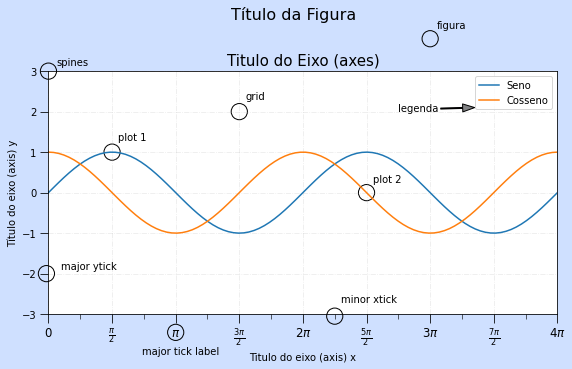

Como vimos, todos os elementos que compõem uma figura podem ser customizados. Isso, entretanto, não significa que nós tenhamos que customiza-los explicitamente sempre que criarmos uma visualização.

Voltando ao que foi dito no início do notebook, o matplotlib oferece mais de uma maneira de ser usado. Dependendo de como escolhermos usá-lo, podemos customizar mais elementos explicitamente ou deixar que o próprio matplotlib decida essas customizações. 

vamos passar brevemente sobre os dados e as bibliotecas que usaremos e depois demonstrar os diferentes maneiras de uso.

<br>

### <font color = #21618C> Bibliotecas e dados
    
Dados: Informações sobre as emissões de gases do efeito estufa, calculados ([metodologia](https://seeg.eco.br/notas-metodologicas)) e disponibilizados pela Seeg.

**basedosdados**: API da [Base dos Dados](https://basedosdados.org/) - iniciativa focada em centralizar, tratar e disponibilizar diversas bases de dados públicas do país.

Tutoriais base dos dados: [github](https://github.com/basedosdados)

In [1]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import basedosdados as bd
import numpy as np

In [2]:
# Obtendo os dados

query = """SELECT ano, sigla_uf, nivel_1, nivel_2, nivel_3,
            nivel_4, nivel_5, nivel_6, tipo_emissao, emissao 
            FROM `basedosdados.br_seeg_emissoes.uf`
            WHERE ano >= 2000"""

df = bd.read_sql(query, billing_project_id = 'projeto1-311803')

# bd.read_sql(): permite realizar a query (SQL) passada como argumento no banco de dados

Downloading: 100%|██████████████████████████████████████████████████████| 1310700/1310700 [02:07<00:00, 10287.20rows/s]


In [3]:
# Removendo valores 0.0
df = df[df['emissao'] != 0]

In [4]:
df.head()

,ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,emissao
2,2003,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,5.030
3,2003,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,20.120
4,2003,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,140.840
5,2003,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Bubalino,Emissão,128.425
6,2003,AC,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Bubalino,Emissão,513.700


### <font color = #21618C> Visualizando as emissões totais da agropecuária ao longo dos anos

In [5]:
# Agrupando por ano e setor emissor (nivel_1)
df_viz = df.groupby(['ano', 'nivel_1'])[['emissao']].sum()

# Removendo multi-index (level = 1)
df_viz = df_viz.reset_index(level = 1)

# Vendo DataFrame
df_viz.head()

,nivel_1,emissao
ano,,
2000,Agropecuária,4.827468e+08
2000,Energia,2.061517e+09
2000,Mudança de Uso da Terra e Floresta,5.510072e+09
2000,Processos Industriais,5.059903e+08
2000,Resíduos,1.937670e+08


## <font color = #21618C> Integração com pandas
Vantagens: rápido e prático

Desvantagens: as customizações são mais limitadas

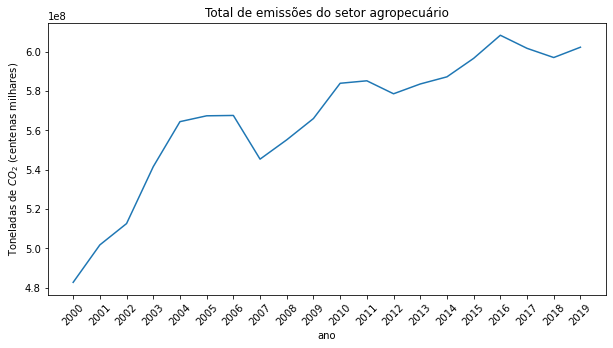

In [6]:
df_viz[df_viz['nivel_1'] == 'Agropecuária']['emissao'].plot(title = 'Total de emissões do setor agropecuário',
                                                            ylabel = 'Toneladas de $CO_{2}$ (centenas milhares)',
                                                            xticks = np.arange(2000, 2020),
                                                            rot = 45,
                                                            figsize = (10, 5))

plt.show()

## <font color = #21618C> Módulo matplotlib.pyplot

In [7]:
# Agrupando por ano, setor da emissão (nivel_1) e origem da emissão (nivel_5)
d = df.groupby(['ano', 'nivel_1', 'nivel_5'])[['emissao']].sum()
d = d.reset_index(level = [1, 2])

# Origem animal
animal = d[(d['nivel_1'] == 'Agropecuária') & (d['nivel_5'] == 'Animal')]['emissao']

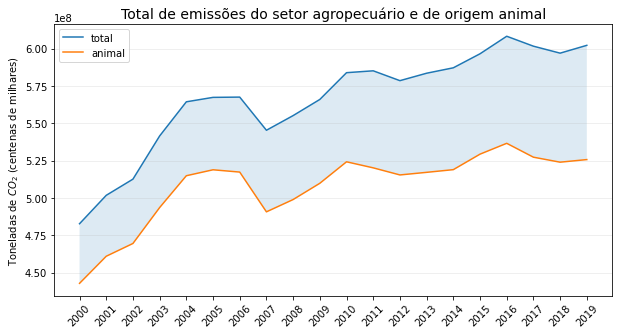

In [8]:
# Definindo eixos
y = df_viz[df_viz['nivel_1'] == 'Agropecuária']['emissao']

# Alterando tamanho do gráfico
plt.figure(figsize = (10,5))

# Plotando linhas
plt.plot(y, label = 'total')
plt.plot(animal, label = 'animal')

# Alterando título e nome dos eixos
plt.title('Total de emissões do setor agropecuário e de origem animal', fontsize = 14)
plt.ylabel('Toneladas de $CO_{2}$ (centenas de milhares)')

# Alterando eixo x
plt.xticks(np.arange(2000, 2020), rotation = 45)

# Ativando as legendas
plt.legend()

# Grids
plt.grid(axis = 'y', alpha = .25)

# Área Sombreada
plt.fill_between(x = np.arange(2000, 2020),
                 y1 = y,
                 y2 = animal,
                 alpha = .15)

plt.show()


# plt.figure(): cria uma nova figura ou altera uma figura existente
# plt.plot(): plota os dados passados como argumento
# plt.title(): define o título do gráfico
# plt.xlabel(): define o nome do eixo x
# plt.ylabel(): define o nome do eixo y
# plt.xticks(): controla os marcadores do eixo x
# plt.grid(): controla os grids do gráfico
# plt.fill_between(): define área sombreada no gráfico

## <font color = #21618C> Programação Orientada à Objetos
---
* Vantagens: é a maneira que permite maior controle sobre as customizações. Facilita criar múltiplos gráficos em uma só figura.

* Desvantagens: requer mais linhas de código
---

#### <font color = #21618C> Brevíssimo resumo sobre POO...

Na POO tudo é um  objeto.

Um objeto pode ser: uma lista, uma tupla, um dataframe, etc.

Apesar de serem estruturas diferentes, todos tem um ponto em comum: possuem regras, métodos e atributos próprios.

Pegando as listas como exemplo, nós não precisamos dizer para o python que a estrutura que queremos é ordenada e mutável, isso é algo comum em todas as listas.

Quando criamos uma variável (independente do tipo dela) estamos _instanciando_ um objeto.

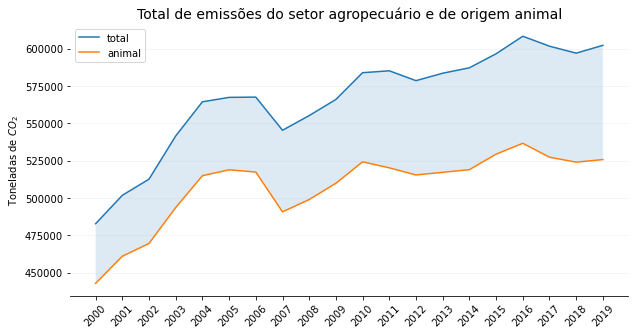

In [9]:
# Matplotlib
# Instanciando uam figura e um 'eixo'
fig, ax = plt.subplots(figsize = (10,5))

# Plotando gráfico
ax.plot(y, label = 'total')
ax.plot(animal, label = 'animal')

# Ativando as legendas
ax.legend()

# Definindo título e nome dos eixos
ax.set_title('Total de emissões do setor agropecuário e de origem animal', fontsize = 14)
ax.set_ylabel('Toneladas de $CO_{2}$')

# Definindo eixos
ax.set_xticks(np.arange(2000, 2020))
ax.set_xticklabels(labels = np.arange(2000, 2020), rotation = 45)
ax.set_yticklabels(np.arange(start = 425000, stop = 650000, step = 25000))

# Preenchimento
ax.fill_between(x = np.arange(2000, 2020),
                y1 = y,
                y2 = animal,
                alpha = .15)

# 'Espinhas' do gráfico
spines = ['top', 'left', 'right']
for spine in spines:
    ax.spines[spine].set_visible(False)
    
# Grids
ax.grid(axis = 'y', alpha = .15)

plt.show()

# plt.subplots(): retorna um objeto matplotlib.figure.Figure e um ou mais objetos matplotlib.axes.Axes
# ax.set_xticks(): permite definir a posição dos ticks no eixo x
# ax.set_xticklabels(): permite definir o valor a ser exibido ao lado de cada tick
# ax.spines(): permite controlar as bordas dos gráficos
# ax.spines.set_visible(): permite exibir ou não a(s) borda(s) do gráfico
# ax.grid(): permite controlar as grades internas do gráfico

## <center>Obrigado pela atenção!

##  <font color = #21618C> Material Elaborado Por:

<tr>
    <td> <img src="imagens/Fernando.png" width = "100" align = "left"/> <td/>
    <td> <pre><font size = 5 align = 'center'>Fernando Gioppato<td/>
<tr/>


<tr>
    <td> <a href="https://www.linkedin.com/in/fernando-gioppato/" > <img src = "imagens/linkedin.png" width = "25"  align = "left" /> </a></td>             
    <td> <a href="https://github.com/feegioppato" > <img src = "imagens/GitHub-Logo.png" width = "60" height = "100" align = "left" /> </a> </td> 
</tr>

### Referências
1 - [Documentação Matplotlib](https://matplotlib.org/stable/index.html)

2 - [Nicolas Rougier. Scientific Visualization: Python + Matplotlib. Nicolas P. Rougier. 2021, 978-2-
9579901-0-8. ffhal-03427242](https://hal.inria.fr/hal-03427242)